In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import folium
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# this cell for adding new imports without running them all 


In [2]:
kchousing = pd.read_csv('../data/kc_house_data.csv')
kchousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
# quick test OLS, problematic don't use

y = kchousing['price']
# X = kchousing.drop(['price', 'date', 'sqft_basement', 'grade',
#                      'condition','view', 'waterfront', 'yr_renovated'], axis=1) # dropping non-numerical columns
Z = zipcodes_ohe # this is only to see how long it takes to run OLS on something with 69 columns
y = y.dropna()
# X = X.dropna()


ols_kch = sm.OLS(y, sm.add_constant(Z)).fit()
ols_kch.summary()

In [ ]:
len(y), len(Z)

In [3]:
# source: https://flatironschool.com/blog/best-tech-companies-seattle/
# finding tech company locations for optimal housing proximity

techcompany_address = ['1 Microsoft Way, Redmond, WA 98052', '601 North 34th St, Seattle, WA 98103',
                      '1111 Expedia Group Way W, Seattle, WA 98119', '605 5th Ave S Suite 400, Seattle, WA 98104',
                      '333 Elliott Ave W #500, Seattle, WA 98119', '255 S King St #1800, Seattle, WA 98104',
                      '410 Terry Ave N, Seattle, WA 98109', '906 Alaskan Way Suite 700, Seattle, WA 98104', '1621 N 34th St, Seattle, WA 98103',
                      '901 5th Ave #1000, Seattle, WA 98164', '2601 Elliott Ave #200, Seattle, WA 98121', '1099 Stewart St #600, Seattle, WA 98101',
                      '2200 1st Ave S, Seattle, WA 98134', '601 108th Ave NE, Suite 1000, Bellevue, WA 98004', '801 5th Ave, Seattle, WA 98104',
                       '506 2nd Ave UNIT 1900, Seattle, WA 98104', '1525 4th Ave #800, Seattle, WA 98101', '1932 1st Ave #300, Seattle, WA 98101',
                      '2211 Elliott Ave #400, Seattle, WA 98121', '1200, 400 Fairview Ave N, Seattle, WA 98109', '316 2nd Ave S Suite 200 Seattle, WA 98104',
                      '719 2nd Ave #800, Seattle, WA 98104', '2200 1st Ave S, Seattle, WA 98134', '95 S Jackson St #100, Seattle, WA 98104',
                      '2101 4th Ave #950, Seattle, WA 98121', '300 Elliott Ave W #500, Seattle, WA 98119', '2033 6th Ave Suite #1100, Seattle, WA 98121',
                      '701 5th Ave 26th floor, Seattle, WA 98104', '200 W Thomas St #400, Seattle, WA 98119', '901 5th Ave #1200, Seattle, WA 98164']

techcompany_name = ['Microsoft', 'Google', 'Expedia', 'Getty', 'Outreach', 'Avalara', 'Amazon', 'Big Fish Games',
                   'Tableau', 'Cray', 'Zulily', 'Redfin', 'Porch', 'SAP Concur', 'F5', 'Xealth', 'Pulumi', 'Apptentive',
                   'Highspot', 'Impinj', 'Upbound', 'Skytap', 'Glowforge', 'Auction Edge', 'GeoEngineers', 'Twillio Zipwhip',
                   'Whitepages', 'Amperity', 'SkyKick', 'PitchBook']

# len(techcompany_address) == len(techcompany_name)  

techcompany_coord = {47.6395481:-122.1316979, 47.6491022:-122.3512428, 47.6278727:-122.3771439, 47.5968424:-122.3288311,
                    47.6207149:-122.3623911, 47.5978827:-122.3309175, 47.6149968:-122.3382836, 47.6035842:-122.3375176,
                    47.6478044:-122.3382225, 47.605816:-122.3319745, 47.6142513:-122.3522433, 47.616631:-122.332592,
                    47.5835923:-122.3336612, 47.6161371:-122.1968104, 47.6051851:-122.331118, 47.6019789:-122.3317164,
                    47.6107471:-122.3397581, 47.6110571:-122.3422495, 47.6114079:-122.3478381, 47.6227313:-122.33609, 47.5995348:-122.3313931,
                    47.5980919:-122.3309701, 47.5838846:-122.3328815, 47.5990386:-122.3349373, 47.6141707:-122.3424675,
                    47.6218759:-122.3615888, 47.614592:-122.3391944, 47.6046363:-122.3307528, 47.6210721:-122.3599327, 47.6056348:-122.3321834}

tc_coord_list = list(techcompany_coord.items())
tc_coord_list


[(47.6395481, -122.1316979),
 (47.6491022, -122.3512428),
 (47.6278727, -122.3771439),
 (47.5968424, -122.3288311),
 (47.6207149, -122.3623911),
 (47.5978827, -122.3309175),
 (47.6149968, -122.3382836),
 (47.6035842, -122.3375176),
 (47.6478044, -122.3382225),
 (47.605816, -122.3319745),
 (47.6142513, -122.3522433),
 (47.616631, -122.332592),
 (47.5835923, -122.3336612),
 (47.6161371, -122.1968104),
 (47.6051851, -122.331118),
 (47.6019789, -122.3317164),
 (47.6107471, -122.3397581),
 (47.6110571, -122.3422495),
 (47.6114079, -122.3478381),
 (47.6227313, -122.33609),
 (47.5995348, -122.3313931),
 (47.5980919, -122.3309701),
 (47.5838846, -122.3328815),
 (47.5990386, -122.3349373),
 (47.6141707, -122.3424675),
 (47.6218759, -122.3615888),
 (47.614592, -122.3391944),
 (47.6046363, -122.3307528),
 (47.6210721, -122.3599327),
 (47.6056348, -122.3321834)]

In [4]:
techcompany_zip = set([i[-5:] for i in techcompany_address])
techcompany_zip

curated_zip = np.array([98052,98102,98103,98105,98109,98119,98121,98134,98164])

curated_zip


array([98052, 98102, 98103, 98105, 98109, 98119, 98121, 98134, 98164])

In [5]:
kchousing['grade_ordinal'] = [int(i[0:2].strip()) for i in kchousing['grade']] # ordinal encoding grade column for OLS interop

In [6]:
# kchousing['bedrooms'].loc[lambda x: x==33].index # locating outlier bedroom row
kchousing['zipcode'].loc[lambda x: x==98102].index

Int64Index([  100,   327,   673,   890,   961,  1317,  1519,  1704,  1943,
             2005,
            ...
            20570, 20675, 20726, 20755, 20838, 20901, 20910, 21055, 21184,
            21567],
           dtype='int64', length=104)

In [7]:
kchousing['price'].mean()

540296.5735055795

In [ ]:
# this cell is all the history of plotting data, not to be run on it's own 

# sns.histplot(kchousing['bathrooms'])
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'})

# sns.histplot(kchousing['zipcode'])
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'})

# sns.histplot(data=kchousing['grade_ordinal'], binwidth=.2 )
# kchousing['grade_ordinal'].value_counts()
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'} )

# sns.swarmplot(x=techcompany_zip, y=kchousing['zipcode'])
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'} )
# sns.swarmplot(x=list(techcompany_zip), y=kchousing['zipcode'])
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'} )
# sns.scatter(x=list(techcompany_zip), y=kchousing['zipcode'])
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'} )
# sns.scatterplot(x=list(techcompany_zip), y=kchousing['zipcode'])

In [8]:
def coordlister(index_num):
    ''' quick function to get the individual coordinates of tech companies for Folium markers'''
    return list(tc_coord_list[index_num])

# coordlister(20) # test

In [9]:
techmap = folium.Map(location=[47.605, -122.331])

def maplabeler (n):
    folium.Marker(coordlister(n)).add_to(techmap)

for i in range(30):
    maplabeler(i)
    
techmap

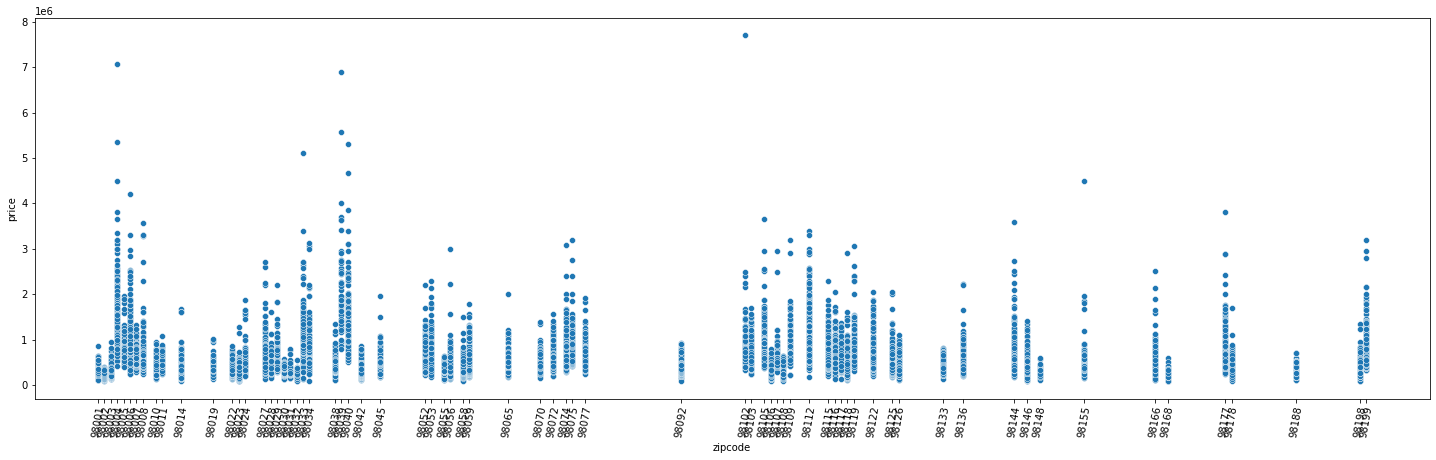

In [10]:
ziplabels = list(set(kchousing['zipcode']))
fig, ax = plt.subplots(figsize=(25,7))
sns.scatterplot(x=kchousing['zipcode'], y=kchousing['price']) # exploratory plot to find most correlated zipcode with price, not for display
# 98004 & 98039 are both the most represented and with the most clustered on the high end; both in Bellevue
# However, neither one of those are in the curated_zip list. Using 98109 makes the zipcode OHE reference South Lake Union, where Amazon, Google, and many other tech companies are, which is also highly represented on the zip-price graph, seems like a good choice
ax.set(xticks=ziplabels)
plt.xticks(rotation=80)
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen'})

# kchousing['zipcode'].max()


In [11]:
# TODO add these OHE'd columns to main data by assigning <dfname>['zipcodes_ohe']
#
# take out the isin function for all zipcodes, if that makes the OLS work. could also narrow down to curated after the OHE on all zipcodes
zips = kchousing.loc[kchousing['zipcode'].isin(curated_zip)].dropna() 
ohe = OneHotEncoder(sparse=False, drop=[98109]) # the zip code with the highest prices in Seattle. could do 98052, near the Microsoft campus as well
ohe.fit(zips['zipcode'].to_numpy().reshape(-1, 1))
zips_encoded = ohe.transform(zips['zipcode'].to_numpy().reshape(-1, 1))

zipcodes_ohe = pd.DataFrame(zips_encoded, columns=ohe.get_feature_names())

In [ ]:
zipc

In [27]:
testframe = pd.concat([kchousing, zipcodes_ohe], join='outer')
testframe.shape

(22886, 27)

In [19]:
kchousing['zipcode'].isin([98057])

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: zipcode, Length: 21597, dtype: bool